In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

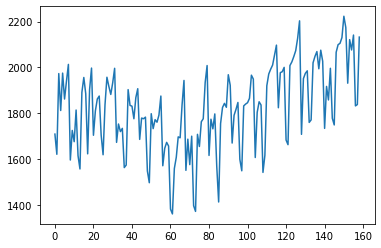

In [2]:
Walmart = pd.read_csv("footfalls.csv")
Walmart.Footfalls.plot()

In [3]:
Walmart

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0


# Splitting data

In [4]:
Train = Walmart.head(147)
Test = Walmart.tail(12)

# Moving Average 

<AxesSubplot:>

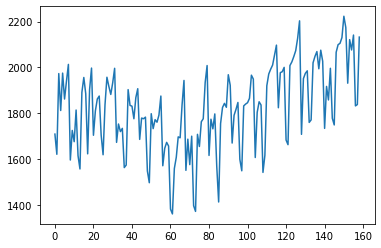

In [5]:
Walmart["Footfalls"].plot()

<AxesSubplot:>

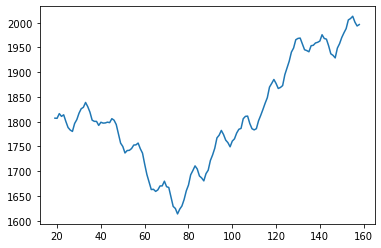

In [6]:
Walmart["Footfalls"].rolling(20).mean().plot(label=str(20))

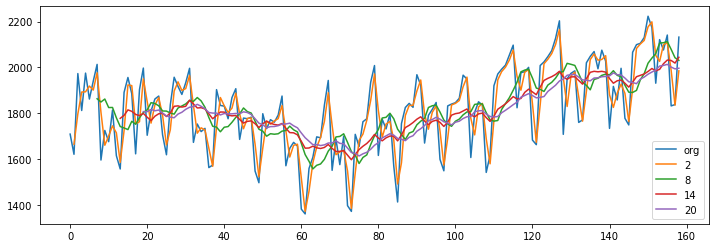

In [7]:
plt.figure(figsize=[12,4])
Walmart.Footfalls.plot(label="org")
for i in range(2,24,6):
    Walmart["Footfalls"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

# Time series decomposition plot 


In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

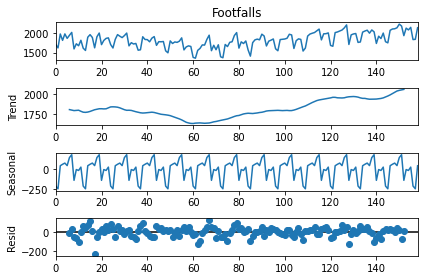

In [9]:
decompose_ts_add = seasonal_decompose(Walmart.Footfalls,period=12)
decompose_ts_add.plot()
plt.show()

# ACF plots and PACF plots


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


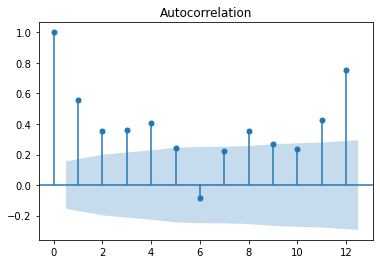

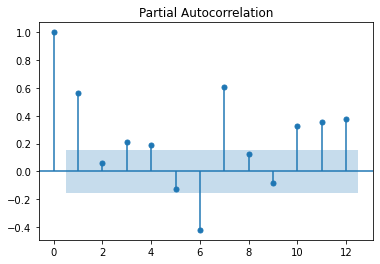

In [21]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(Walmart.Footfalls,lags=12)
tsa_plots.plot_pacf(Walmart.Footfalls,lags=12)
plt.show()


### Evaluation Metric MAPE

In [10]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### Simple Exponential Method


In [26]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES


In [27]:
ses_model = SimpleExpSmoothing(Train["Footfalls"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Footfalls) 


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


8.490637057828362

### Holt method 

In [28]:
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing


In [29]:
# Holt method 
hw_model = Holt(Train["Footfalls"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Footfalls) 

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Admin\AppData\Local\Temp/ipykernel_16844/1714323129.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Footfalls"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


7.546249229496066

### Holts winter exponential smoothing with additive seasonality and additive trend


In [30]:
hwe_model_add_add = ExponentialSmoothing(Train["Footfalls"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Footfalls) 

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


2.6748196958856236

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [31]:
hwe_model_mul_add = ExponentialSmoothing(Train["Footfalls"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Footfalls)

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


4.238666032273202

## Final Model by combining train and test

In [32]:
hwe_model_add_add = ExponentialSmoothing(Walmart["Footfalls"],seasonal="add",trend="add",seasonal_periods=12).fit()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [33]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

159    2152.457473
160    2165.602422
161    2162.802663
162    2247.700393
163    2244.034122
164    1952.378271
165    2142.193951
166    2117.779535
167    2183.834006
168    1909.820546
dtype: float64